In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
datapath = '../Ram/Data_Sets/'
filename = 'titanic_train.csv'
#filename = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
sep = ','
train_datafile = datapath+filename
#target = ['target_1','target_2','target_3']
target = 'Survived'

In [3]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(712, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5,C124,S


In [4]:
filename = 'titanic_test.csv'
url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test.head(1)

(712, 12) (179, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C


In [5]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "titanic"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = 

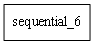


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.328358208955224}
    original datasize = 713, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 11
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1200
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 11, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml\mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting validati

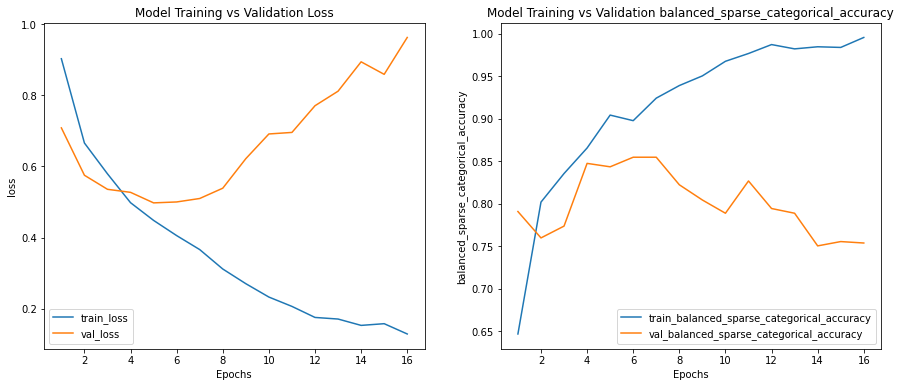

Time taken to train model (in mins) = 1
    Stopped epoch = 6
Held out data actuals shape: (96,)
    samples from label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 0 0 0 0 1 0 0 0 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 84.4%
    Balanced Accuracy = 85.2%
    Precision         = 72.5%
    Average Precision = 82.7%
    Recall            = 87.9%
    F1 Score          = 79.5%
    ROC AUC           = 86.9%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.008350442
    set learning rate using best model: 0.008350442
    max epochs for training = 6

Model not being saved since save_model_flag set to False...
7038

Saving vocab dictionary using pickle in titanic\auto\model_2021_11_01-08_19_46\artifacts\cat_vocab_dict.pickle...will take time...
    Saved pickle file in titanic\auto\model_2021_11_01-08_19_46\artifacts\cat_vocab_dict.pickle

Saving variable definitions file using pickle in titanic\auto\model_2021_11_01-08_19_46\artifacts\var_df.pickle...will take time...
    Saved pickle file in titanic\auto\model_2021_11_01-08_19_46\artifacts\var_df.pickle

Deep_Auto_ViML completed. Total ti

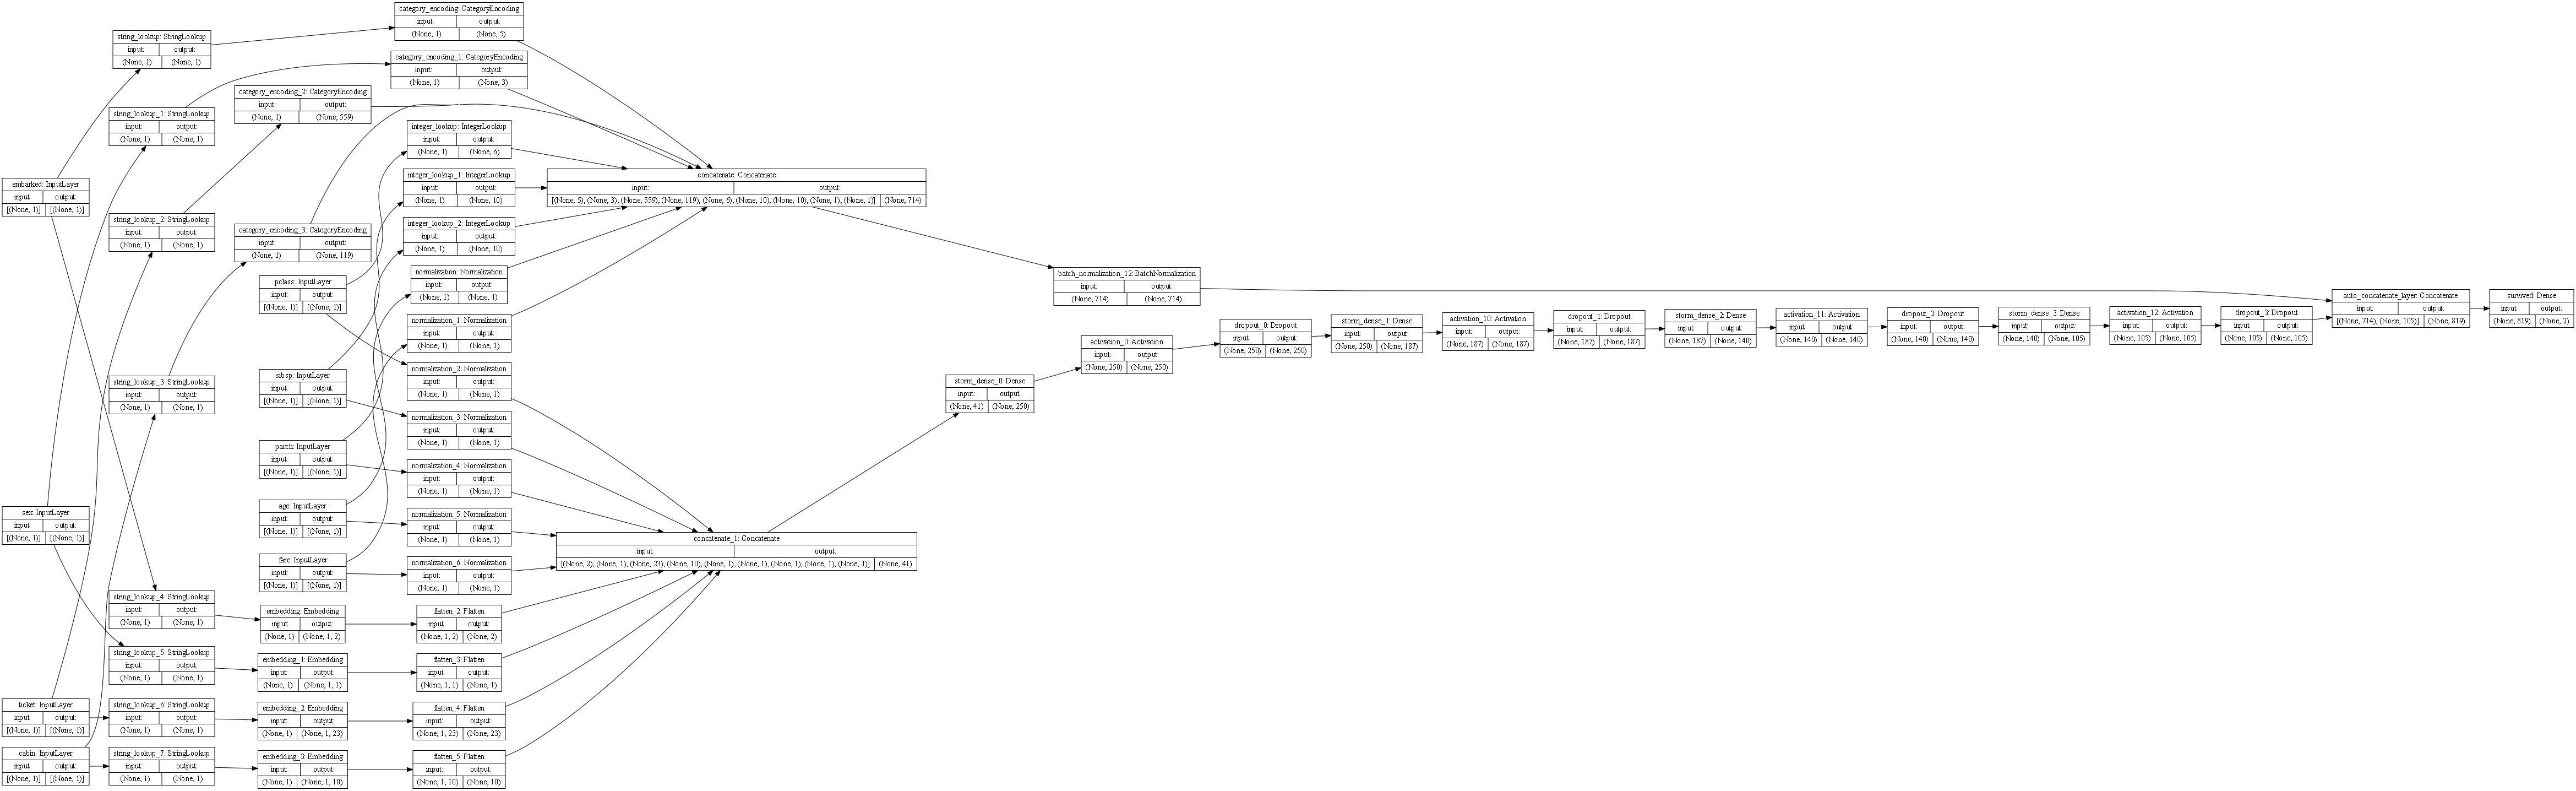

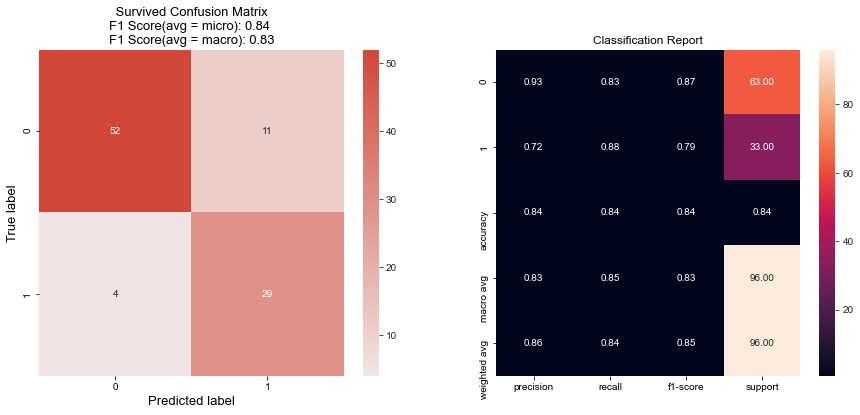

In [6]:
 model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

In [7]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
#from autoviml.Auto_ViML import plot_regression_scatters

In [8]:
predictions = deepauto.predict(model, project_name, test_dataset=url,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x000001C85CBACCA0> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x000001C85CBACCA0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 179
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! cabin has 2 mixed data types: Index([<class 'float'>, <class 'str'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    nu

In [9]:
y_preds = predictions[1]
y_preds[:10]

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [10]:
y_test = test[target].values
y_test[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [11]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(y_test, y_preds)))
print(classification_report(y_test, y_preds))

Balanced Accuracy = 71.3%
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       105
           1       0.58      0.86      0.70        74

    accuracy                           0.69       179
   macro avg       0.72      0.71      0.69       179
weighted avg       0.74      0.69      0.69       179



In [12]:
#print_regression_model_stats(y_test, y_preds)

# 

# 